# Supervised Learning, part 2 


In class Tuesday, you had the opportunity to learn about another classification method and modules to validate

* Exposure to the [Scikit-learn toolbox](https://scikit-learn.org/stable/index.html)
* Metrics to evaluate performance of ML algorithm
* Cross-Validation
* Learning Curves 
* Decision Trees 

In the previous lab, we looked at KNN, performance metrics, and confusion matrix. 

In this lab session, we will look at the following: 

* Scikit learning methods and useful functions
* Decision Trees
* Support Vector Machines (new topic today!) 
* Random Forests (new topic today!) 

Useful Links: http://scikit-learn.org/stable/index.html

### Helper Methods to Visualize Classification Results

Here are two methods to help visualize the decision boundary of classification models. 

In [522]:
# """ Decision boundary plotting function from Hands-On Machine Learning with Scikit-Learn
# and TensorFlow """

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
    
# Function adapted from source: 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X
               [:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## 1. Setup Notebook 

Perform the following steps:
* Import library numpy, matplotlib, 
* Import from scikit-learn the datasets, neighbors, metrics, model selection libraries
* Load cancer dataset using sklearn datasets and assign to "cancer"
* Look into the various attributes of the cancer dataset: attribute names, target classes, size of data 

In [523]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, neighbors, metrics, model_selection

#loading the cancer data
cancer = datasets.load_breast_cancer()

In [524]:
print(f"Attributes names: {cancer.feature_names}")

print("\nTarget classes of cancer data: ", cancer["target_names"],"\n") 

print ("No of samples and features in cancer datasets is {} and {} respectively"
       .format(cancer.data.shape[0], cancer.data.shape[1]))


Attributes names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target classes of cancer data:  ['malignant' 'benign'] 

No of samples and features in cancer datasets is 569 and 30 respectively


## 2. Review KNN and model fitting



###  Q2A. Visualize Performance vs. Complexity 

Create and explore a visualization for the when number of neighbors in KNN is changed from 1 to 30

Use the following procedure:

* Split the data into training (70%) and testing (30%)
    * To maintain consistency among students, let's use random state of 65
* Use a for loop to explore the number of neighbors parameters 
    * Inside the loop, you will have to build the knn, train the model and compute the accuracy on train and test sets 
    * The training and testing accuracy for each neighbor (iteration) can be
     stored
    * Look into time module in python, you can make a note of time to train the model for each iteration, this could be used in the below sections
* Plot the training and testing accuracy versus the number of neighbors 

In [525]:
import time
from sklearn.model_selection import train_test_split
training_accuracy = []
test_accuracy = []
dur_time = []

x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target, 
                                             test_size=0.30, random_state=65)
for k in range(1,31):
  knn = neighbors.KNeighborsClassifier(n_neighbors = k)
  start = time.time()
  knn.fit(x_train, y_train)
  stop = time.time()
  y_pred_test  = knn.predict(x_test)
  y_pred_train = knn.predict(x_train)
  test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))
  training_accuracy.append(metrics.accuracy_score(y_train, y_pred_train))
  dur_time.append(stop - start)

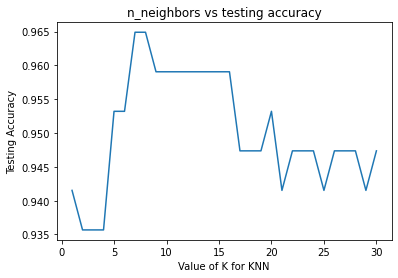

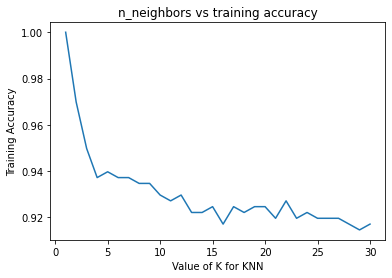

In [526]:
# plot the relationship between n_neighbors and testing accuracy
plt.plot(range(1,31), test_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('n_neighbors vs testing accuracy')
plt.show()

# plot the relationship between n_neighbors and training accuracy
plt.plot(range(1,31), training_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Training Accuracy')
plt.title('n_neighbors vs training accuracy')
plt.show()

### Q2B. Plot the training time vs. complexity 

Create a plot using the training time stored from above to show it changes with the number of neighbors (complexity).  

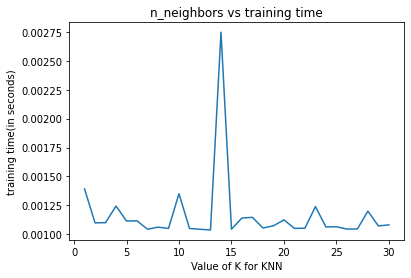

In [527]:
""" use plot to visualize the duration vs n_neighbors """
# plot the relationship between n_neighbors and training time
plt.plot(range(1,31), dur_time)
plt.xlabel('Value of K for KNN')
plt.ylabel('training time(in seconds)')
plt.title('n_neighbors vs training time')
plt.show()

### Q2C. score 

Look at the `score` function for KNN:  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score

Describe how you can simplify your code above by making use of the `score` function. 

#### Q2C - Answer 
When you call score on classifiers, the method computes the accuracy score by default.
It makes predictions using X_test under the hood and uses those predictions to calculate accuracy score.

It is a shorthand implementation of prediction and accuracy_score function.



In [528]:
import pandas as pd
knn_acc = []
for k in range(1,31):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)
    knn_acc.append((k, test_score ,train_score))
df = pd.DataFrame(knn_acc, columns=['K','Test_Score','Train_Score'])
print(df)

     K  Test_Score  Train_Score
0    1    0.759155     1.000000
1    2    0.849472     0.903897
2    3    0.836761     0.854777
3    4    0.826893     0.824268
4    5    0.834299     0.815481
5    6    0.828732     0.807488
6    7    0.838781     0.800957
7    8    0.836677     0.793206
8    9    0.835869     0.791047
9   10    0.827073     0.785058
10  11    0.830811     0.777340
11  12    0.832245     0.779267
12  13    0.836824     0.776826
13  14    0.833743     0.772994
14  15    0.831515     0.777211
15  16    0.827175     0.775573
16  17    0.825742     0.771936
17  18    0.823455     0.768911
18  19    0.824136     0.765518
19  20    0.827133     0.763448
20  21    0.823107     0.758568
21  22    0.823745     0.759208
22  23    0.823532     0.755296
23  24    0.817443     0.752667
24  25    0.815609     0.750619
25  26    0.812062     0.748263
26  27    0.811718     0.742685
27  28    0.807447     0.741543
28  29    0.806780     0.739562
29  30    0.808046     0.738599


## 3. Support Vector Machines 

Some of the different kernels that can be accessed by Scikit learn are shown below. 
* Linear 
* Gaussian 
* Exponential
* Polynomial 
* hybrid
* Sigmoidal

Read the below reference for accessing kernels in scikit learn
http://scikit-learn.org/stable/modules/svm.html#svm-kernels

We will use Linear, Gaussian and polynominal for current dataset problem and possibly we could try different kernel approach during regression lab session.

Complete the following steps:  
* The cancer dataset needs to be loaded for working on the below problem
* Import necessary svm modules

In [529]:
from sklearn import svm
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 3A. Simplified problem 

Let's consider only the first two features for classification, i.e., mean radius and mean texture. 


In [530]:
# Take mean radius and mean texture for cancer classification data, 
#  assign to "X" and cancer target names to "y"

X = cancer.data[:,0:2]
y = cancer.target

### 3B. Linear Kernel 

Apply the "linear Kernel" and observe what happens with different value of C-cost. 

In [531]:
# Explore using SVC fit complete data of cancer data and target features 
#  values for C = [10^-2, 10^-1, 1, 10, 100]
c = [0.01,0.1,1,10,100]
linear_vals = []
for i in c:
  t1 = time.time()
  svc = svm.SVC(kernel ='linear', C = i).fit(X, y)
  t2 = time.time()
  linear_vals.append((i, (t2-t1)))
  #print("Total duration of fitting: {} s".format(t2-t1))

df_L = pd.DataFrame(linear_vals, columns=['C-cost','Duration_of_fitting'])
print(df_L)

   C-cost  Duration_of_fitting
0    0.01             0.006645
1    0.10             0.008642
2    1.00             0.013035
3   10.00             0.024348
4  100.00             0.169191


Once, you have fit the linear SVC kernel above, use function plot_predictions function to visualize the classifiers.  The code also adds the training data to the plot - consider the `plt.scatter` function.

Text(0.5, 1.0, 'SVC with linear kernel')

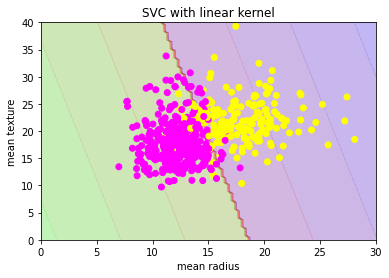

In [532]:
# Use the function provided in the early cell plot_prediction to visualize 
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with linear kernel')

Describe what happens when you change the values of C. 

**Answer**  
As we increase the value of C, then the width of the boundary(or margin) will be increased and it take more time for fitting the model.

### Q3C. RBF Kernel 

Apply the "rbf kernel" and observe what happens with different values of C-cost and gamma.  


In [533]:
# for SVC from svm, use 
#  values for C = [10^-2, 10^-1, 1, 10, 100]
#  values for gamma = [0.01, 0.1, 0.5]
c = [0.01,0.1,1,10,100]
g = [0.01, 0.1, 0.5]
rbf_val = []
for i in c:
  for j in g:
    t1 = time.time()
    svc = svm.SVC(kernel ='rbf',gamma=j, C = i).fit(X, y)
    t2 = time.time()
    rbf_val.append((i, j ,(t2-t1)))
    #print("Total duration of fitting: {} s".format(t2-t1))

df_R = pd.DataFrame(rbf_val, columns=['C-cost','gamma','Duration_of_fitting'])
print(df_R.sort_values(by="C-cost"))


    C-cost  gamma  Duration_of_fitting
0     0.01   0.01             0.017065
1     0.01   0.10             0.009560
2     0.01   0.50             0.010696
3     0.10   0.01             0.006063
4     0.10   0.10             0.007001
5     0.10   0.50             0.013688
6     1.00   0.01             0.004460
7     1.00   0.10             0.006084
8     1.00   0.50             0.012148
9    10.00   0.01             0.005038
10   10.00   0.10             0.008085
11   10.00   0.50             0.015070
12  100.00   0.01             0.011004
13  100.00   0.10             0.027422
14  100.00   0.50             0.017097


Once, we have fit the rbf SVC kernel, use functions `plot_predictions` and `plt.scatter` to visualize the SVC working.

Text(0.5, 1.0, 'SVC with rbf kernel')

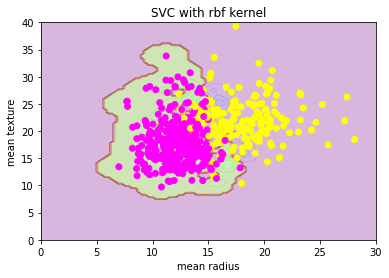

In [534]:
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with rbf kernel')

Describe what happens when you change the values of C and gamma. 

**ANSWER** 
As we increase the value of C then the width of the boundary(or margin) will be increased and it take more time for fitting the model.

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

### Q3D. Polynomial Kernel 

- Similar to linear kernel, train the svc for poly kernel and visualize the results.  
- Do you still need gamma? 
- Check what parameters are useful for this [kernel](https://scikit-learn.org/stable/modules/svm.html#svm-kernels). 
- Consider different degrees starting from 1 to 5
- There might be a case, where the notebook takes almost impossible time to train. In this case, you may need to interrupt the Kernel. 

In [535]:
# # for SVC  
poly_val = []
for d in range(1,6):
  t1 = time.time()
  svc=svm.SVC(kernel='poly', degree=d).fit(X, y)
  t2 = time.time()
  poly_val.append((d, (t2-t1)))

df_P = pd.DataFrame(poly_val, columns=['degree','Duration_of_fitting'])
print(df_P)

   degree  Duration_of_fitting
0       1             0.008605
1       2             0.008015
2       3             0.066086
3       4             1.981563
4       5            55.709297


Text(0.5, 1.0, 'SVC with polynomial kernel')

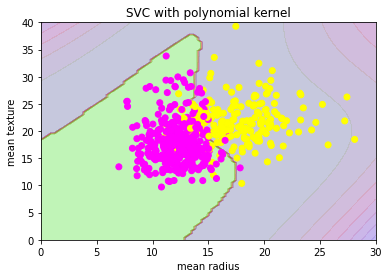

In [536]:
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with polynomial kernel')

Questions and Observations: 

1. What do you observe as you increase the degree of the polynomial (with respect to the plot and time for computation)? 
2. Compare what happens when d=1 or use the linear kernel

Solutions: *Fill in with your responses*

1. As we increase the degree of the polynomial, then it take more time for fitting the model and related to plot as we increase,degree of dimentions will increase.
2. In polynomial kernal,when d=1, it is similar to the linear kernal.

### Q3E. Run Multiple SVMs on Full Data set 

Apply SVMs with different parameters to the full cancer dataset with a 70/30 training/testing split. 
Try: 

* linear kernel 
* polynomial kernel 
* rbf kernel 

Look at a few different values of `C` and other parameters for each kernel.

Report out which kernel and parameter combination has the best and worst value in terms of training time and accuracy.  Note, you do not need to do a full grid search here to find the best/worst combinations, but should try 3-4 combinations per kernel. 

In [537]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.3)
## Linear SVM
c = [0.01,0.1,1,10,100]
k= 'linear'
linear_vals = []
for i in c:
  t1 = time.time()
  svc = svm.SVC(kernel ='linear', C = i).fit(X_train, y_train)
  t2 = time.time()
  y_pred_l=svc.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred_l)*100
  linear_vals.append((k,i, (t2-t1), accuracy))

df_ln = pd.DataFrame(linear_vals, columns=['kernel','C-cost',
                   'Training_time(in seconds)','accuracy_score(in percentage)'])
df_ln=df_ln.sort_values(by=["accuracy_score(in percentage)",
                         'Training_time(in seconds)'],ascending =(False, True))
df_ln.reset_index(drop=True, inplace=True)
df_ln

,kernel,C-cost,Training_time(in seconds),accuracy_score(in percentage)
0,linear,10.00,3.744369,95.906433
1,linear,100.00,4.696113,95.906433
2,linear,1.00,3.229698,94.736842
3,linear,0.10,0.106041,92.982456
4,linear,0.01,0.022391,92.397661


In [538]:
## Polynomial SVM 
k= 'Polynomial'
poly_val = []
for d in range(1,6):
  t1 = time.time()
  svc=svm.SVC(kernel='poly', degree=d).fit(X_train, y_train)
  t2 = time.time()
  y_pred_p=svc.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred_p)*100
  poly_val.append((k,d, (t2-t1),accuracy))

df_py=pd.DataFrame(poly_val, columns=['kernel','degree','Training_time(in seconds)'
                                          ,'accuracy_score(in percentage)'])
df_py=df_py.sort_values(by=["accuracy_score(in percentage)",
                         'Training_time(in seconds)'],ascending =(False, True))
df_py.reset_index(drop=True, inplace=True)
df_py

,kernel,degree,Training_time(in seconds),accuracy_score(in percentage)
0,Polynomial,4,0.002525,90.058480
1,Polynomial,3,0.002565,90.058480
2,Polynomial,2,0.004174,90.058480
3,Polynomial,1,0.004347,90.058480
4,Polynomial,5,0.002559,88.888889


In [539]:
## RBF SVM
k= 'RBF'
c = [0.01,0.1,1,10,100]
g = [0.01, 0.1, 0.5]
rbf_val = []
for i in c:
  for j in g:
    t1 = time.time()
    svc = svm.SVC(kernel ='rbf', gamma=j, C = i).fit(X_train, y_train)
    t2 = time.time()
    y_pred_r=svc.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_r)*100
    rbf_val.append((k,i, j ,(t2-t1),accuracy))
    #print("Total duration of fitting: {} s".format(t2-t1))

df_rbf = pd.DataFrame(rbf_val, columns=['kernel','C-cost','gamma',
                   'Training_time(in seconds)','accuracy_score(in percentage)'])
df_rbf=df_rbf.sort_values(by=["accuracy_score(in percentage)",
                      'Training_time(in seconds)'],ascending =(False, True))
df_rbf.reset_index(drop=True, inplace=True)
df_rbf

,kernel,C-cost,gamma,Training_time(in seconds),accuracy_score(in percentage)
0,RBF,0.01,0.10,0.011138,64.912281
1,RBF,1.00,0.50,0.011501,64.912281
2,RBF,10.00,0.10,0.012115,64.912281
3,RBF,0.10,0.10,0.012252,64.912281
4,RBF,1.00,0.10,0.012379,64.912281
5,RBF,0.10,0.50,0.012413,64.912281
6,RBF,10.00,0.50,0.012427,64.912281
7,RBF,0.10,0.01,0.012723,64.912281
8,RBF,0.01,0.50,0.013060,64.912281
9,RBF,1.00,0.01,0.013179,64.912281


In [540]:
print("Best value in terms of training time and accuracy: \n")
df_ln.iloc[[0]]

Best value in terms of training time and accuracy: 



,kernel,C-cost,Training_time(in seconds),accuracy_score(in percentage)
0,linear,10.0,3.744369,95.906433


In [541]:
print("Worst value in terms of training time and accuracy: \n")
df_rbf.iloc[[-1]]

Worst value in terms of training time and accuracy: 



,kernel,C-cost,gamma,Training_time(in seconds),accuracy_score(in percentage)
14,RBF,0.01,0.01,0.015358,64.912281


## 4. Decision Trees

### Q4A. Develop DT classifier 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
- Import the necessary modules for decision tree classifiers
- Use random state = 5
- test size = 40%
- train a model with a max depth of 5 and other parameters set to default values 
- report the score on the test data 
- report the classification report on the test data

In [542]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [543]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                  test_size=0.4, random_state=5)
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
pred_y = dt.predict(X_test)
acc=accuracy_score(y_test, pred_y)
print(f"Accuracy_score : {acc}\n")
print(f'''Classification report on the test data :
         {classification_report(y_test,pred_y)}''')

Accuracy_score : 0.956140350877193

Classification report on the test data :
                       precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.97      0.97      0.97       151

    accuracy                           0.96       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228



### Q4B. DT parameters
- Lets visualize the DT based classifiers and dataset as shown in the previous section about SVM
- Make sure, you are training the model with only two features (column index 22 and 27)
- Using function visualize_classifier(), visualize the DT classification and scatter plots of data

ex:
visualize_classifier(classifier, iris.data[:, :2], iris.target)

In [544]:
X = cancer.data[:,[22,27]]
y = cancer.target

import warnings
warnings.filterwarnings('ignore')

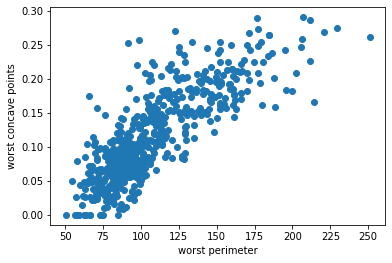

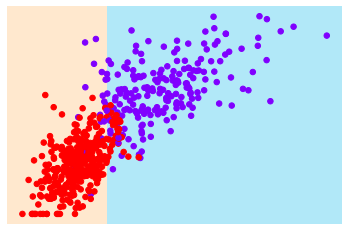

In [545]:
# develop the Decision Tree model with depth of 1
dt = tree.DecisionTreeClassifier(max_depth=1)
dt.fit(X, y)

plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[22])
plt.ylabel(cancer.feature_names[27])
plt.show()

visualize_classifier(dt, X, y)

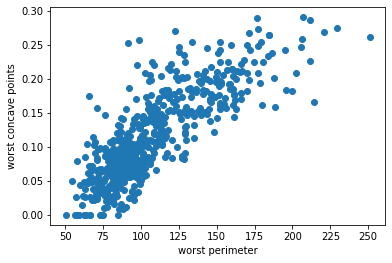

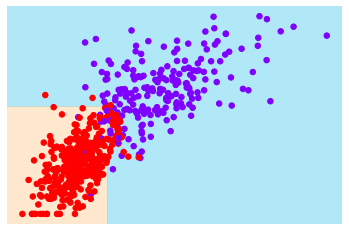

In [546]:
# develop the Decision Tree model with depth of 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[22])
plt.ylabel(cancer.feature_names[27])
plt.show()

visualize_classifier(dt, X, y)

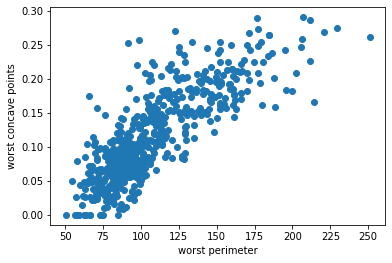

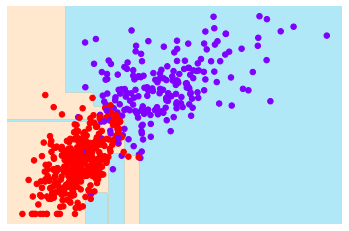

In [547]:
# develop the Decision Tree model with depth of 5
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(X, y)

plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[22])
plt.ylabel(cancer.feature_names[27])
plt.show()

visualize_classifier(dt, X, y)

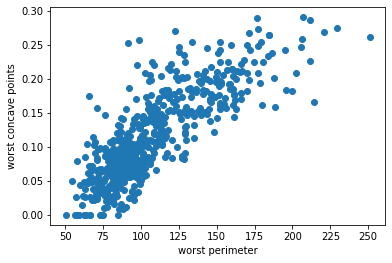

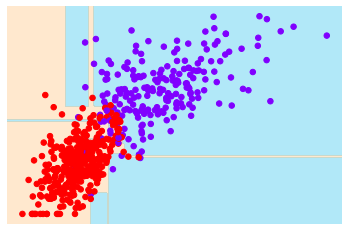

In [548]:
# develop the Decision Tree model with depth of 10 
dt = tree.DecisionTreeClassifier(max_depth=10)
dt.fit(X, y)

plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[22])
plt.ylabel(cancer.feature_names[27])
plt.show()

visualize_classifier(dt, X, y)

### Q4C. DT tune parameters over splits 

To fine tune the parameters, we need some cross-validation method to support. Use the k-fold validation method explained in class
* In class, you had worked on kFold with Decision Tree.
* With in the kFold loop consider four different levels of complexity max_depth = 1, 3, 5, 10
* Use n_folds = 5, that is 5-fold c.v. 
* Set random_state to be 3
* Report a table with the min/ave./max accuracy for the different DT parameters.

In [549]:
kf=model_selection.KFold(n_splits=5, random_state=3, shuffle=True)

C=[1,3,5,10]
acc = np.zeros((5,4))
i=0
for train_index, test_index in kf.split(cancer.data):
    x_train, x_test = cancer.data[train_index], cancer.data[test_index]
    y_train, y_test = cancer.target[train_index], cancer.target[test_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(x_train,y_train)
        yhat = dt.predict(x_test)
        acc[i][j] = metrics.accuracy_score(y_test, yhat)
        j=j+1
    i=i+1

df_kf = pd.DataFrame(np.array([C,np.min(acc,axis = 0),np.mean(acc,axis = 0),
                      np.max(acc,axis = 0)]).transpose(), 
                     columns=['Max_depth','Minimum','Average','Maximum'])
print(df_kf)

   Max_depth   Minimum   Average   Maximum
0        1.0  0.876106  0.899783  0.947368
1        3.0  0.920354  0.938457  0.973684
2        5.0  0.893805  0.929638  0.964912
3       10.0  0.911504  0.931424  0.956140


### Bonus Q4E. Stratified K-fold 


Look at using Stratified K-Fold cross-validation  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

Explain why you may want to use the StratifiedKFold vs KFold? 



**ANSWER**


KFold split the dataset into k consecutive folds of equal sizes (if possible).
And if we use the KFold for unbalanced dataset, we might endup in a training data that conatins no or very few minority classes.
To avoid this problem, we use the stratified KFold. StratifiedKFold is a variation of k-fold which returns stratified folds: 
each set contains approximately the same percentage of samples of each target class as the complete set.